In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16

# Determining proper grid resolution for flow over the Witch of Agnesi hill

Short study of the FFT of a bell-shaped hill for given numerical grid resolution versus the theoretical Fourier transform to determine a proper grid resolution

Copyright 2023 Dries Allaerts

Licensed under the Apache License, Version 2.0.

### Hill shape and parameters

Hill shape $h\left(x\right) = \large\frac{h_{max}}{1+\left(\frac{x}{L}\right)^2}$


In [4]:
L = 1000.0   # Characteristic length scale of the hill (half width at half height) [m]
hmax = 100.0 # Height of the hill [m]

In [5]:
h = lambda x: hmax/(1+(x/L)**2) # Shape function of the hill

In [6]:
Lx = 2000*L  # Length of the numerical domain for the Fourier Transform [m]

### Calculate Fourier representation on different numerical grids

In [7]:
def WoA_Fourier_representation(Nx):
    # Numerical grid in real space
    xs,dx = np.linspace(-Lx/2,Lx/2,int(Nx),endpoint=False,retstep=True)
    
    # Corresponding wave numbers in Fourier space
    ks = 2.0 * np.pi * np.fft.rfftfreq(int(Nx),dx)
    
    # Fourier representation of the hill
    hc = np.fft.rfft(h(xs),norm='forward')
    
    # Scale factor
    # In theory, scale factor = pi * L * hmax. However, due to the discrete nature, the scale factor for the
    # fft is the integral of h(xs), which approximates pi * L * hmax. As in LBoW the fft is scaled with Nx
    # such that the first mode corresponds to the mean value rather than the sum, the scale is based on
    # the mean rather than the integral
    scale = np.pi*L*hmax / Lx / np.mean(h(xs))

    
    print('Horizontal grid resolution is {} m (= {} L)'.format(dx,dx/L))
    
    return hc, ks, dx/L, scale

In [8]:
hc1, ks1, dx1, scale1 = WoA_Fourier_representation(1e5)

Horizontal grid resolution is 20.0 m (= 0.02 L)


In [9]:
hc2, ks2, dx2, scale2 = WoA_Fourier_representation(4e4)

Horizontal grid resolution is 50.0 m (= 0.05 L)


In [10]:
hc3, ks3, dx3, scale3 = WoA_Fourier_representation(2e4)

Horizontal grid resolution is 100.0 m (= 0.1 L)


In [11]:
hc4, ks4, dx4, scale4 = WoA_Fourier_representation(1e4)

Horizontal grid resolution is 200.0 m (= 0.2 L)


In [12]:
hc5, ks5, dx5, scale5 = WoA_Fourier_representation(4e3)

Horizontal grid resolution is 500.0 m (= 0.5 L)


### Results

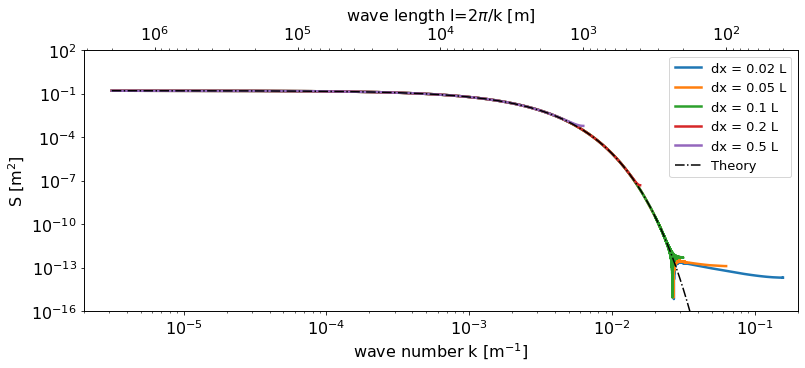

In [14]:
f,ax = plt.subplots(1,1,figsize=(12.8,4.8))
ax.loglog(ks1[1:],scale1*np.abs(hc1[1:]),linewidth=2.5,label='dx = {} L'.format(dx1))
ax.loglog(ks2[1:],scale2*np.abs(hc2[1:]),linewidth=2.5,label='dx = {} L'.format(dx2))
ax.loglog(ks3[1:],scale3*np.abs(hc3[1:]),linewidth=2.5,label='dx = {} L'.format(dx3))
ax.loglog(ks4[1:],scale4*np.abs(hc4[1:]),linewidth=2.5,label='dx = {} L'.format(dx4))
ax.loglog(ks5[1:],scale5*np.abs(hc5[1:]),linewidth=2.5,label='dx = {} L'.format(dx5))
_ = ax.set(xlim=[2e-6,2e-1],ylim=[1e-16,1e2],xlabel=r'wave number k [m$^{-1}$]',ylabel=r'S [m$^2$]')

# Theoretical Fourier transform pair
# In theory, scale factor = pi * L * hmax. As in LBoW the fft is scaled with Nx
# such that the first mode corresponds to the mean value rather than the sum, the scale is set as
# pi * L * hmax / Lx so as to correspond to the mean rather than to the integral
ax.loglog(ks1[1:],np.pi*L*hmax/Lx * np.exp(-L*ks1[1:]),'-.k',label='Theory')
ax.legend(fontsize=13)
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlabel(r'wave length l=2$\pi$/k [m]')
_ = ax2.set_xlim((2*np.pi/ax.get_xlim()[0],2*np.pi/ax.get_xlim()[1]))

It can be seen that for $k>0.03$, the FFT deviates from the theoretical Fourier transform of a bell-shaped curve, which is likely due to round-off errors. Therefore, a grid resolution of 0.1 L is sufficient. Higher grid resolutions will not lead to more accurate FFT approximations of the theoretical solution.